# Koordinatsättning med hjälp av socknar och landskap


För botaniska föremål insamlade i Sverige är det vanligt att man känner till socken medan koordinat saknas. Genom att använda sockenkoordinater som tagits fram vid herbariet i Lund skulle det därmed vara möjligt att med relativt enkla medel koordinatsätta en stor del av våra svenska samlingsföremål.

Vad kan vi då åstadkomma genom att använda landskaps- och sockenkoordinater? Först undersöker jag hur många föremålsposter som potentiellt skulle kunna koordinatsättas för några botaniska samlingar vid Naturhistoriska riksmuseet i Stockholm (kärlväxter, mossor, alger och svampar (inklusive lavar). Sedan tittar jag på hur det kan se ut för en icke-botanisk samling. Jag använder den entomologiska samlingen vid Naturhistoriska riksmuseet som exempel.

In [4]:
# Importera diverse bibliotek
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Landskap och socknar hos kärlväxter


In [5]:
vasc_plants = pd.read_csv('s-vascular-plants-20160330.csv', encoding='utf8', dtype='unicode')
vasc_plants.tail(10)

,Locality,Province,Parish,latitud grader,longitud grader,rubin1,RT90N,RT90E
664826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
664827,"Plantae suecicae. Hieracium Öland Kastlösa, al...",Öland,Kastlösa,NaN,NaN,NaN,NaN,NaN
664828,"Plantae suecicae. Hieracium Öland Segerstad, a...",Öland,Segerstad,NaN,NaN,NaN,NaN,NaN
664829,"Plantae suecicae. Hieracium Öland Segerstad, a...",Öland,Segerstad,NaN,NaN,NaN,NaN,NaN
664830,"Plantae suecicae. Hieracium Öland Smedby, Part...",Öland,Smedby,NaN,NaN,NaN,NaN,NaN
664831,"Plantae suecicae. Hieracium Öland Ventlinge, a...",Öland,Ventlinge,NaN,NaN,NaN,NaN,NaN
664832,Plantae suecicae. Hieracium Öland Södra Möckle...,Öland,Södra Möckleby,NaN,NaN,NaN,NaN,NaN
664833,Plantae suecicae. Hieracium Öland Södra Möckle...,Öland,Södra Möckleby,NaN,NaN,NaN,NaN,NaN
664834,Plantae suecicae. Hieracium Öland Södra Möckle...,Öland,Södra Möckleby,NaN,NaN,NaN,NaN,NaN
664835,Flora Suecica. Hieracium Öland Vickleby alvar ...,Öland,Vickleby,NaN,NaN,NaN,NaN,NaN


### Antal svenska föremålsposter

In [6]:
vasc_plants_tot_cnt = len(vasc_plants)
vasc_plants_tot_cnt

664836

### Poster med information om landskap

In [7]:
vasc_plants_landskap_cnt = vasc_plants.Province.notnull().sum()
vasc_plants_landskap_frq = vasc_plants_landskap_cnt / vasc_plants_tot_cnt
print(
    '{} poster ({:.1%} av alla svenska poster)'
    .format(vasc_plants_landskap_cnt, vasc_plants_landskap_frq))

660263 poster (99.3% av alla svenska poster)


### Poster med information om socken

In [8]:
vasc_plants_socken_cnt = vasc_plants.Parish.notnull().sum()
vasc_plants_socken_frq = vasc_plants_socken_cnt / vasc_plants_tot_cnt
print(
    '{} poster ({:.1%} av alla svenska poster)'
    .format(vasc_plants_socken_cnt, vasc_plants_socken_frq))

643382 poster (96.8% av alla svenska poster)


### Poster med detaljerad lokalinformation

Fördelningen hos antalet tecken i fältet "Locality". Textlängder upp till 300 tecken visas.

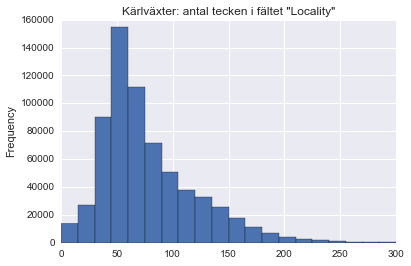

In [35]:
vasc_plants_strlen = vasc_plants.Locality.fillna('').str.len()
vasc_plants_strlen.plot.hist(
    bins=20, xlim=(0, 300), range=(0, 300),
    title='Kärlväxter: antal tecken i fältet "Locality"')

### Poster med koordinater

Huvudsakligen tre typer av koordinater förekommer: (1) WGS84 (eller förmodad WGS84), (2) Rikets Nät 1990 (RT90) eller en RUBIN (dvs. alfanumeriska koordinater enligt Rikets Nät.

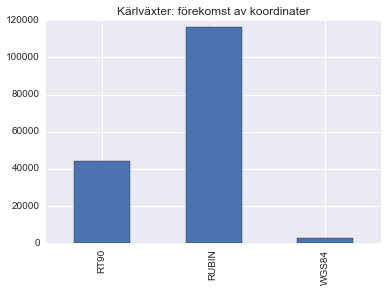

In [34]:
vasc_plants_coordinates = pd.DataFrame({
        'WGS84': (vasc_plants['latitud grader'].notnull() & vasc_plants['longitud grader'].notnull()),
        'RT90': (vasc_plants.RT90E.notnull() & vasc_plants.RT90N.notnull()),
        'RUBIN': vasc_plants.rubin1.notnull()})
vasc_plants_coordinates.sum().plot.bar(title='Kärlväxter: förekomst av koordinater')

Antal poster med någon av koordinattyperna:

In [11]:
vasc_plants_coordinate_cnt = vasc_plants_coordinates.any(axis=1).sum()
vasc_plants_coordinate_frq = vasc_plants_coordinate_cnt / vasc_plants_tot_cnt
print(
    '{} poster ({:.1%} av alla svenska poster)'
    .format(vasc_plants_coordinate_cnt, vasc_plants_coordinate_frq))

133807 poster (20.1% av alla svenska poster)


# Landskap och socknar hos mossor

In [12]:
mosses = pd.read_csv('s-mosses-20160331.csv', encoding='utf8', dtype='unicode')
mosses.tail(10)

,provins,distrikt,lokal,RT90E,RT90N,Rubin1,latitud_grad,longitud_grad
125409,Gotland,NaN,"Gotland, Thorsborg",NaN,NaN,NaN,NaN,NaN
125410,Gotland,NaN,"Gotland, Thorsburgen",NaN,NaN,NaN,NaN,NaN
125411,Gotland,NaN,"Gotland, Thorsburgen",NaN,NaN,NaN,NaN,NaN
125412,Gotland,NaN,Gotland: Thorsburgen,NaN,NaN,NaN,NaN,NaN
125413,Gotland,Kräklingbo,"Gotland, Kräklingbo, Torsburgen",NaN,NaN,NaN,NaN,NaN
125414,Östergötland,Vånga,"Östergötland, Vånga, Lenbergsvik",NaN,NaN,NaN,NaN,NaN
125415,Östergötland,Vånga,"Östergötland, Vånga sn",NaN,NaN,NaN,NaN,NaN
125416,Östergötland,Vånga,"Östergötland, Vånga, Lenbergsvik",NaN,NaN,NaN,NaN,NaN
125417,Östergötland,Vånga,"Östergötland, Vånga sn",NaN,NaN,NaN,NaN,NaN
125418,Jämtland,Åre,"Jämtland, Åre, Blåhammarkläppen, västra sidan",NaN,NaN,NaN,NaN,NaN


### Antal svenska föremålsposter

In [13]:
mosses_tot_cnt = len(mosses)
mosses_tot_cnt

125419

### Poster med information om landskap

In [14]:
mosses_landskap_cnt = mosses.provins.notnull().sum()
mosses_landskap_frq = mosses_landskap_cnt / mosses_tot_cnt
print(
    '{} poster ({:.1%} av alla svenska poster)'
    .format(mosses_landskap_cnt, mosses_landskap_frq))

125254 poster (99.9% av alla svenska poster)


### Poster med information om socken

In [15]:
mosses_socken_cnt = mosses.distrikt.notnull().sum()
mosses_socken_frq = mosses_socken_cnt / mosses_tot_cnt
print(
    '{} poster ({:.1%} av alla svenska poster)'
    .format(mosses_socken_cnt, mosses_socken_frq))

110971 poster (88.5% av alla svenska poster)


### Poster med detaljerad lokalinformation

Fördelningen hos antalet tecken i fältet "lokal". Textlängder upp till 300 tecken visas.

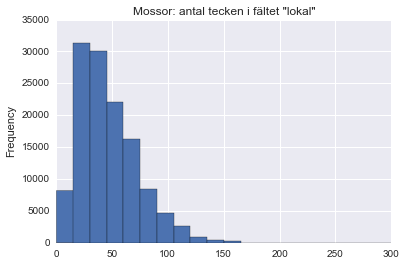

In [36]:
mosses_strlen = mosses.lokal.fillna('').str.len()
mosses_strlen.plot.hist(
    bins=20, xlim=(0, 300), range=(0, 300),
    title='Mossor: antal tecken i fältet "lokal"')

### Poster med koordinater

Huvudsakligen tre typer av koordinater förekommer: (1) WGS84 (eller förmodad WGS84), (2) Rikets Nät 1990 (RT90) eller en RUBIN (dvs. alfanumeriska koordinater enligt Rikets Nät.

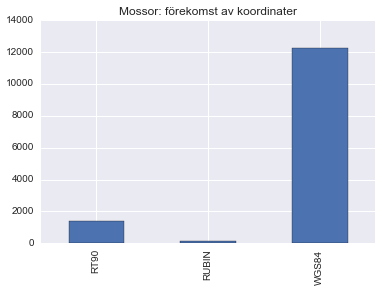

In [37]:
mosses_coordinates = pd.DataFrame({
        'WGS84': (mosses['latitud_grad'].notnull() & mosses['longitud_grad'].notnull()),
        'RT90': (mosses.RT90E.notnull() & mosses.RT90N.notnull()),
        'RUBIN': mosses.Rubin1.notnull()})
mosses_coordinates.sum().plot.bar(title='Mossor: förekomst av koordinater')

Antal poster med någon av koordinattyperna:

In [18]:
mosses_coordinate_cnt = mosses_coordinates.any(axis=1).sum()
mosses_coordinate_frq = mosses_coordinate_cnt / mosses_tot_cnt
print(
    '{} poster ({:.1%} av alla svenska poster)'
    .format(mosses_coordinate_cnt, mosses_coordinate_frq))

13200 poster (10.5% av alla svenska poster)


# Landskap och socknar hos alger

In [19]:
algae = pd.read_csv('s-algae-20160331.csv', encoding='utf8', dtype='unicode')
algae.tail(10)

,provins,distrikt,lokal,RT90E,RT90N,Rubin1,latitud_grad,longitud_grad
8092,Bohuslän,Strömstad,"Sweden, Bohuslän, Tjärnö - Koster",NaN,NaN,NaN,NaN,NaN
8093,Bohuslän,Strömstad,"Sweden, Bohuslän, Tjärnö - Koster",NaN,NaN,NaN,NaN,NaN
8094,Bohuslän,Strömstad,"Sweden, Bohuslän, Tjärnö - Koster",NaN,NaN,NaN,NaN,NaN
8095,Bohuslän,Strömstad,"Sweden, Bohuslän, Tjärnö. Koord.: 58°53'N 11°8'E",NaN,NaN,NaN,NaN,NaN
8096,Bohuslän,Strömstad,"Sweden, Bohuslän, Tjärnö marinbiologiska stati...",NaN,NaN,NaN,NaN,NaN
8097,Bohuslän,Strömstad,"Sweden, Bohuslän, Tjärnö. Koord.: 58°53'N 11°8'E",NaN,NaN,NaN,NaN,NaN
8098,Bohuslän,Strömstad,"Sweden, Bohuslän, Tjärnö - Koster",NaN,NaN,NaN,NaN,NaN
8099,Bohuslän,Strömstad,"Sweden, Bohuslän, Tjärnö. Koord.: 58°53'N 11°8'E",NaN,NaN,NaN,NaN,NaN
8100,Bohuslän,Skaftö,Kilen.,NaN,NaN,NaN,NaN,NaN
8101,Skåne,Helsingborg,Helsingborg.,NaN,NaN,NaN,NaN,NaN


### Antal svenska föremålsposter

In [20]:
algae_tot_cnt = len(algae)
algae_tot_cnt

8102

### Poster med information om landskap

In [21]:
algae_landskap_cnt = algae.provins.notnull().sum()
algae_landskap_frq = algae_landskap_cnt / algae_tot_cnt
print(
    '{} poster ({:.1%} av alla svenska poster)'
    .format(algae_landskap_cnt, algae_landskap_frq))

7869 poster (97.1% av alla svenska poster)


### Poster med information om socken

In [22]:
algae_socken_cnt = algae.distrikt.notnull().sum()
algae_socken_frq = algae_socken_cnt / algae_tot_cnt
print(
    '{} poster ({:.1%} av alla svenska poster)'
    .format(algae_socken_cnt, algae_socken_frq))

6161 poster (76.0% av alla svenska poster)


### Poster med detaljerad lokalinformation

Fördelningen hos antalet tecken i fältet "lokal". Textlängder upp till 300 tecken visas.

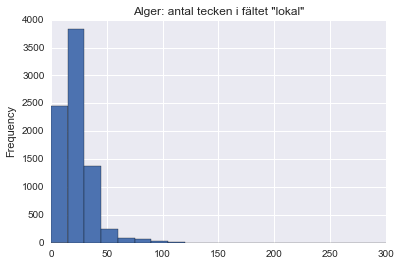

In [38]:
algae_strlen = algae.lokal.fillna('').str.len()
algae_strlen.plot.hist(
    bins=20, xlim=(0, 300), range=(0, 300),
    title='Alger: antal tecken i fältet "lokal"')

### Poster med koordinater

Huvudsakligen tre typer av koordinater förekommer: (1) WGS84 (eller förmodad WGS84), (2) Rikets Nät 1990 (RT90) eller en RUBIN (dvs. alfanumeriska koordinater enligt Rikets Nät.

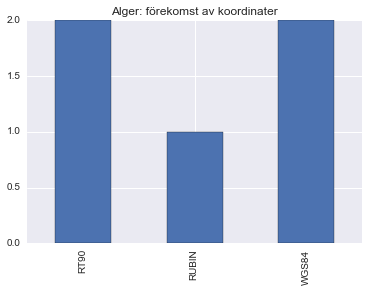

In [40]:
algae_coordinates = pd.DataFrame({
        'WGS84': (algae['latitud_grad'].notnull() & algae['longitud_grad'].notnull()),
        'RT90': (algae.RT90E.notnull() & algae.RT90N.notnull()),
        'RUBIN': algae.Rubin1.notnull()})
algae_coordinates.sum().plot.bar(title='Alger: förekomst av koordinater')

Antal poster med någon av koordinattyperna:

In [25]:
algae_coordinate_cnt = algae_coordinates.any(axis=1).sum()
algae_coordinate_frq = algae_coordinate_cnt / algae_tot_cnt
print(
    '{} poster ({:.1%} av alla svenska poster)'
    .format(algae_coordinate_cnt, algae_coordinate_frq))

5 poster (0.1% av alla svenska poster)


# Landskap och socknar hos svampar och lavar

In [26]:
fungi = pd.read_csv('s-fungi-20160331.csv', encoding='utf8', dtype='unicode')
fungi.tail(10)

,provins,distrikt,lokal,RT90E,RT90N,Rubin1,latitud_grad,longitud_grad
170251,Östergötland,Skedevi,"Östergötland, Skedevi s:n, Rejmyra",NaN,NaN,NaN,NaN,NaN
170252,Uppland,Uppsala,"Uppland, Bondkyrka, Ultuna, Sunnersta skogen",NaN,NaN,NaN,NaN,NaN
170253,Uppland,Uppsala,"Uppland, Bondkyrka, Ultuna",NaN,NaN,NaN,NaN,NaN
170254,Uppland,Uppsala,"Uppland, Uppsala, Sunnersta skogen",NaN,NaN,NaN,NaN,NaN
170255,Uppland,Uppsala,"Uppland, Uppsala, Kungsparken",NaN,NaN,NaN,NaN,NaN
170256,Uppland,Uppsala,"Uppland, Uppsala, Kungsparken",NaN,NaN,NaN,NaN,NaN
170257,Uppland,Uppsala,"Uppland, Uppsala, Södra Åsen",NaN,NaN,NaN,NaN,NaN
170258,Uppland,Uppsala,"Uppland, Uppsala, S. Åsen",NaN,NaN,NaN,NaN,NaN
170259,Uppland,Uppsala,"Uppland, Uppsala, Grindstuguskogen",NaN,NaN,NaN,NaN,NaN
170260,Uppland,Uppsala,"Uppland, Uppsala, Löfgrens villa",NaN,NaN,NaN,NaN,NaN


### Antal svenska föremålsposter

In [27]:
fungi_tot_cnt = len(fungi)
fungi_tot_cnt

170261

### Poster med information om landskap

In [28]:
fungi_landskap_cnt = fungi.provins.notnull().sum()
fungi_landskap_frq = fungi_landskap_cnt / fungi_tot_cnt
print(
    '{} poster ({:.1%} av alla svenska poster)'
    .format(fungi_landskap_cnt, fungi_landskap_frq))

168684 poster (99.1% av alla svenska poster)


### Poster med information om socken

In [29]:
fungi_socken_cnt = fungi.distrikt.notnull().sum()
fungi_socken_frq = fungi_socken_cnt / fungi_tot_cnt
print(
    '{} poster ({:.1%} av alla svenska poster)'
    .format(fungi_socken_cnt, fungi_socken_frq))

157149 poster (92.3% av alla svenska poster)


### Poster med detaljerad lokalinformation

Fördelningen hos antalet tecken i fältet "lokal". Textlängder upp till 300 tecken visas.

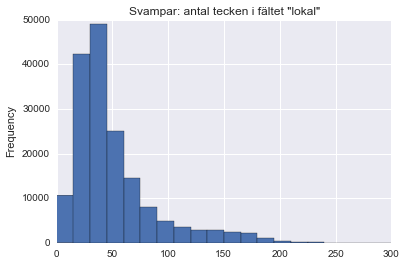

In [41]:
fungi_strlen = fungi.lokal.fillna('').str.len()
fungi_strlen.plot.hist(
    bins=20, xlim=(0, 300), range=(0, 300),
    title='Svampar: antal tecken i fältet "lokal"')

### Poster med koordinater

Huvudsakligen tre typer av koordinater förekommer: (1) WGS84 (eller förmodad WGS84), (2) Rikets Nät 1990 (RT90) eller en RUBIN (dvs. alfanumeriska koordinater enligt Rikets Nät.

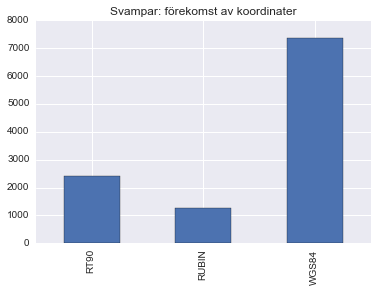

In [42]:
fungi_coordinates = pd.DataFrame({
        'WGS84': (fungi['latitud_grad'].notnull() & fungi['longitud_grad'].notnull()),
        'RT90': (fungi.RT90E.notnull() & fungi.RT90N.notnull()),
        'RUBIN': fungi.Rubin1.notnull()})
fungi_coordinates.sum().plot.bar(title='Svampar: förekomst av koordinater')

Antal poster med någon av koordinattyperna:

In [32]:
fungi_coordinate_cnt = fungi_coordinates.any(axis=1).sum()
fungi_coordinate_frq = fungi_coordinate_cnt / fungi_tot_cnt
print(
    '{} poster ({:.1%} av alla svenska poster)'
    .format(fungi_coordinate_cnt, fungi_coordinate_frq))

8160 poster (4.8% av alla svenska poster)


# Landskap och socknar i en entomologiska samling

Följande SQL-fråga kördes mot Specify-databasen för att ta ut alla poster med föremål som samlats in i **Sverige**.

```    
SELECT 
    collectionobject.remarks,
    locality.localityname,
    CONCAT_WS(
		', ', CAST(latitude1 AS CHAR), CAST(longitude1 AS CHAR)
	) AS coordinate,
    locality.disciplineid,
    geography.fullname
FROM
    collectionobject
        INNER JOIN
    collection USING (collectionid)
        LEFT JOIN
    collectingevent USING (collectingeventid)
        LEFT JOIN
    locality USING (localityid)
        LEFT JOIN
    geography USING (geographyid)
WHERE
    collection.code = 'NHRS'
        AND geography.fullname LIKE '%Sweden%'
LIMIT 100000
;

```

Posterna exporteras till CSV och läses sedan in i Python:

In [44]:
nhrs = pd.read_csv('nhrs-20160307.csv', encoding='utf8')

Låt oss ta en titt på hur data ser ut (här visas de 10 sista posterna):

In [45]:
nhrs.tail(10)

,remarks,localityname,coordinate,disciplineid,fullname
45837,Anthrax\r\nhottentotta L.\r\n\r\nSdm Huddinge\...,Ågesta,"59.2333000000, 18.0833000000",3,"Södermanland, Sweden"
45838,"SWEDEN, Skåne\r\nFlommen\r\n9.VII.2006\r\nR. H...",Flommen,"55.4067000000, 12.8325000000",3,"Skåne, Sweden"
45839,"SWEDEN, Skåne\r\nFlommen\r\n9.VII.2006\r\nR. H...",Flommen,"55.4067000000, 12.8325000000",3,"Skåne, Sweden"
45840,"SWEDEN, Skåne\r\nFlommen\r\n9.VII.2006\r\nR. H...",Flommen,"55.4067000000, 12.8325000000",3,"Skåne, Sweden"
45841,"SWEDEN, Skåne\r\nFlommen\r\n9.VII.2006\r\nR. H...",Flommen,"55.4067000000, 12.8325000000",3,"Skåne, Sweden"
45842,SWEDEN: SÖ: Nyköping\r\nområdet runt Strandbad...,Strandbadet Byggninge,"58.7817000000, 17.4050000000",3,"Södermanland, Sweden"
45843,NaN,Ostro Gothiae,NaN,3,"Östergötland, Sweden"
45844,NaN,Oelandia,NaN,3,"Öland, Sweden"
45845,NaN,Oelandia,NaN,3,"Öland, Sweden"
45846,NaN,Gotland [No precise locality information avail...,NaN,3,"Gotland, Sweden"


### Antal svenska föremålsposter

In [46]:
nhrs_tot_cnt = len(nhrs)
nhrs_tot_cnt

45847

### Poster med information om landskap

Vi kollar också upp hur många poster som för närvarande är kopplade till landskap:

In [47]:
landskap = [
    'Blekinge', 'Bohuslän', 'Dalarna', 'Dalsland', 'Gotland',
    'Gästrikland', 'Halland', 'Hälsingland', 'Härjedalen', 'Jämtland',
    'Lappland', 'Lule Lappmark', 'Lycksele Lappmark', 'Medelpad',
    'Norrbotten', 'Närke', 'Pite Lappmark', 'Skåne', 'Småland',
    'Södermanland', 'Torne Lappmark', 'Uppland', 'Värmland',
    'Västerbotten', 'Västergötland', 'Västmanland', 'Ångermanland',
    'Åsele Lappmark', 'Öland', 'Östergötland']

matches = []
for lskp in landskap:
    matches.append(nhrs.fullname.str.contains(lskp))
nhrs_landskap_cnt = pd.concat(matches).sum()
nhrs_landskap_frq = nhrs_landskap_cnt / nhrs_tot_cnt
print(
    '{} poster ({:.1%} av alla svenska poster)'
    .format(nhrs_landskap_cnt, nhrs_landskap_frq))

43281 poster (94.4% av alla svenska poster)


### Poster med etikettavskrift

Information om socken kan man hitta i text som skrivits av från etiketter. Här räknas antalet svenska föremålsposter som troligen har en etikettavskrift (värdet är sannolikt överskattat eftersom fältet "remarks" även kan innehålla annat än ren etikettavskrift):

In [49]:
nhrs_labeltext_cnt = nhrs.remarks.notnull().sum()
nhrs_labeltext_frq = nhrs_labeltext_cnt / nhrs_tot_cnt
print(
    '{} poster ({:.1%} av alla svenska poster)'
    .format(nhrs_labeltext_cnt, nhrs_labeltext_frq))

24037 poster (52.4% av alla svenska poster)


### Poster som bör kunna kopplas till socken

Här räknar vi antalet poster som relativt enkelt bör kunna kopplas ihop med en socken:

In [50]:
nhrs_remarks_socken_mask = nhrs.remarks.str.contains(
    '\ssn$|\ssn[\s\.,;]|s:n|socken', na=False)
nhrs_localityname_socken_mask = nhrs.localityname.str.contains(
    '\ssn$|\ssn[\s\.,;]|s:n|socken', na=False)
nhrs_socken_cnt = (nhrs_remarks_socken_mask | nhrs_localityname_socken_mask).sum()
nhrs_socken_frq = nhrs_socken_cnt / nhrs_tot_cnt
print(
    '{} poster ({:.1%} av alla svenska poster)'
    .format(nhrs_socken_cnt, nhrs_socken_frq))

289 poster (0.6% av alla svenska poster)


### Poster med detaljerad lokalinformation

Det är svårt att filtrera ut poster som har detaljerad information om insamlingsplatsen. Detta beror på att fältet "localityname" i Specify inte får lämnas tomt. Entomologerna brukar vanligtvis (dock inte alltid!) skriva "No precise locality information avialable" i fältet när detaljerad information saknas. Således kan vi räkna alla de övriga posterna:

In [51]:
nhrs_detailed_locality_cnt = (~nhrs.localityname.str.contains('[Nn]o\s+precise', na=True, regex=True)).sum()
nhrs_detailed_locality_frq = nhrs_detailed_locality_cnt / nhrs_tot_cnt
print(
    '{} poster ({:.1%} av alla svenska poster)'
    .format(nhrs_detailed_locality_cnt, nhrs_detailed_locality_frq))

42541 poster (92.8% av alla svenska poster)


Fördelningen hos antalet tecken i fältet "localityname". Textlängder upp till 300 tecken visas.

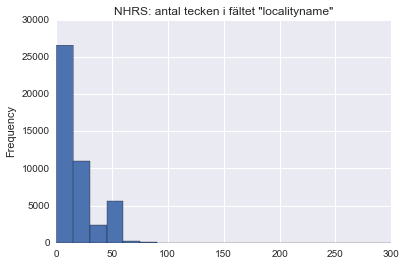

In [53]:
nhrs_localityname_strlen = nhrs.localityname.fillna('').str.len()
nhrs_localityname_strlen.plot.hist(
    bins=20, xlim=(0, 300), ylim=(0, 30000), range=(0, 300),
    title='NHRS: antal tecken i fältet "localityname"')

Fördelningen hos antalet tecken i fältet "remarks". Textlängder upp till 300 tecken visas.

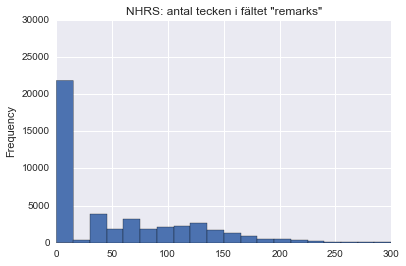

In [54]:
nhrs_remarks_strlen = nhrs.remarks.fillna('').str.len()
nhrs_remarks_strlen.plot.hist(
    bins=20, xlim=(0, 300), ylim=(0, 30000), range=(0, 300),
    title='NHRS: antal tecken i fältet "remarks"')

### Poster med koordinater

Avslutningsvis räknar vi antalet svenska poster med koordinater:

In [55]:
nhrs_coord_cnt = nhrs.coordinate.notnull().sum()
nhrs_coord_frq = nhrs_coord_cnt / nhrs_tot_cnt
print(
    '{} poster ({:.1%} av alla svenska poster)'
    .format(nhrs_coord_cnt, nhrs_coord_frq))

31511 poster (68.7% av alla svenska poster)
